In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("flights.csv", usecols=["CARGO", "PRICE", "WEIGHT"])
df

,CARGO,PRICE,WEIGHT
0,Nimble,1540,16
1,Nimble,1635,20
2,Nimble,1592,15
3,Nimble,1173,10
4,Nimble,1909,11
...,...,...,...
645,Medium,398,58
646,Medium,321,107
647,Medium,339,53
648,Medium,329,128


In [40]:
df1 = df.pivot_table(
    index="CARGO",
    values=["WEIGHT","PRICE"],
    aggfunc="sum"
)
df1

,PRICE,WEIGHT
CARGO,,
Jumbo,76795,18709
Medium,36312,9507
Nimble,752588,7545


In [41]:
df2 = df.pivot_table(
    index="CARGO",
    aggfunc="count"
)
df2

,PRICE,WEIGHT
CARGO,,
Jumbo,50,50
Medium,100,100
Nimble,500,500


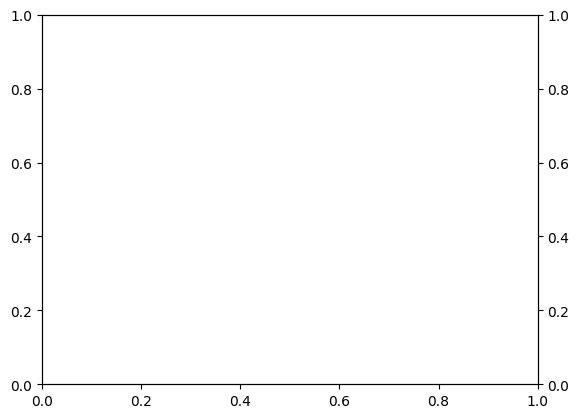

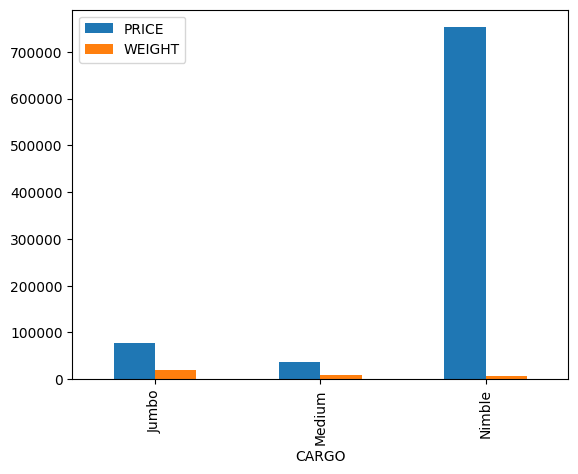

In [89]:
fig, ax = plt.subplots()
ax1=ax.twinx()
df1 = df.pivot_table(
    index="CARGO",
    values=["WEIGHT","PRICE"],
    aggfunc="sum"
).plot(kind="bar")

# ax = df1.plot( kind= 'bar' , secondary_y= 'PRICE' )
# ax.legend(loc="center")
# df1.PRICE.plot(kind='bar', ax=ax,width=0.3, position=0)
# df1.WEIGHT.plot(kind='bar',color="orange" , ax=ax1,width=0.3, position=1)
# ax.set_ylabel('Total price')
# ax1.set_ylabel('Total weight')
# df2.plot.bar(ax=ax1)

    CARGO  num   price  weight
0   Jumbo   50   76795   18709
1  Medium  100   36312    9507
2  Nimble  500  752588    7545


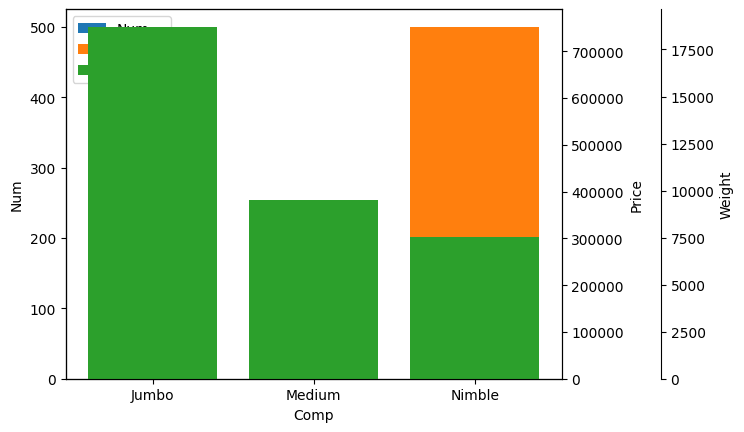

In [85]:
fig, ax = plt.subplots()
# fig.subplots_adjust(right=0.75)
twin1 = ax.twinx()
twin2 = ax.twinx()
df2 = df.groupby("CARGO").agg(
    num = ("CARGO", "count"),
    price = ("PRICE", "sum"),
    weight = ("WEIGHT", "sum"),
).reset_index()
print(df2)
twin2.spines.right.set_position(("axes", 1.2))
p1 = ax.bar(df2["CARGO"], df2["num"], color="tab:blue", label="Num")
p2 = twin1.bar(df2["CARGO"], df2["price"], color="tab:orange", label="Price")
p3 = twin2.bar(df2["CARGO"], df2["weight"], color="tab:green", label="Weight")

ax.set(xlabel="Comp", ylabel="Num")
twin1.set(ylabel="Price")
twin2.set(ylabel="Weight")

# ax.yaxis.label.set_color(p1.get_color())
# twin1.yaxis.label.set_color(p2.get_color())
# twin2.yaxis.label.set_color(p3.get_color())

# ax.tick_params(axis='y', colors=p1.get_color())
# twin1.tick_params(axis='y', colors=p2.get_color())
# twin2.tick_params(axis='y', colors=p3.get_color())

ax.legend(handles=[p1, p2, p3])